### NLP Implementations covers the introductory aspects of NLP in general.

credits to: Derek Jedamski

Likedin NLP course

# NLP Basics: Reading in text data & why do we need to clean the text?

### Read in semi-structured text data

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
cd '/content/drive/My Drive/NLP/Ex_Files_NLP_Python_ML_EssT/Ex_Files_NLP_Python_ML_EssT/Exercise Files/Ch05/05_04/Start'

/content/drive/My Drive/NLP/Ex_Files_NLP_Python_ML_EssT/Ex_Files_NLP_Python_ML_EssT/Exercise Files/Ch05/05_04/Start


In [ ]:
ls

05_04.ipynb  SMSSpamCollection.tsv


In [ ]:
# Read in the raw text
rawData = open("SMSSpamCollection.tsv").read()

# Print the raw data
rawData[0:500]

"ham\tI've been searching for the right words to thank you for this breather. I promise i wont take your help for granted and will fulfil my promise. You have been wonderful and a blessing at all times.\nspam\tFree entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005. Text FA to 87121 to receive entry question(std txt rate)T&C's apply 08452810075over18's\nham\tNah I don't think he goes to usf, he lives around here though\nham\tEven my brother is not like to speak with me. They treat me like aid"

In [ ]:
import pandas as pd

fullCorpus = pd.read_csv('SMSSpamCollection.tsv', sep='\t', header=None)

### Explore the dataset

In [ ]:
fullCorpus.head()

,0,1
0,ham,I've been searching for the right words to tha...
1,spam,Free entry in 2 a wkly comp to win FA Cup fina...
2,ham,"Nah I don't think he goes to usf, he lives aro..."
3,ham,Even my brother is not like to speak with me. ...
4,ham,I HAVE A DATE ON SUNDAY WITH WILL!!


In [ ]:
fullCorpus.rename({0: 'Label', 1:'Label_text'}, axis=1, inplace=True)

In [ ]:
# What is the shape of the dataset?
print("The Dataset has {} rows and {} columns.".format(len(fullCorpus),len(fullCorpus.columns)))

The Dataset has 5568 rows and 2 columns.


In [ ]:
# How many spam/ham are there?
print("Of {} records, there are {} number of ham data and {} spam data".format(len(fullCorpus),len(fullCorpus[fullCorpus['Label'] == 'ham']),
len(fullCorpus[fullCorpus['Label'] == 'spam'])))

Of 5568 records, there are 4822 number of ham data and 746 spam data


In [ ]:
fullCorpus.isnull().sum()[0]

0

In [ ]:
# How much missing data is there?
print("There are a total of {} and {} missing values in the label and label text columns respectively".format(fullCorpus.isnull().sum()[0], fullCorpus.isnull().sum()[1]))

There are a total of 0 and 0 missing values in the label and label text columns respectively


# NLP Basics: Learning how to use regular expressions


### Using regular expressions in Python

Python's `re` package is the most commonly used regex resource. More details can be found [here](https://docs.python.org/3/library/re.html).

In [ ]:
import re

re_test = 'This is a made up string to test 2 different regex methods'
re_test_messy = 'This      is a made up     string to test 2    different regex methods'
re_test_messy1 = 'This-is-a-made/up.string*to>>>>test----2""""""different~regex-methods'

### Splitting a sentence into a list of words

In [ ]:

re.split('\s', re_test)

['This',
 'is',
 'a',
 'made',
 'up',
 'string',
 'to',
 'test',
 '2',
 'different',
 'regex',
 'methods']

In [ ]:

#multi-space
re.split('\s+', re_test_messy)

['This',
 'is',
 'a',
 'made',
 'up',
 'string',
 'to',
 'test',
 '2',
 'different',
 'regex',
 'methods']

In [ ]:


#words)
re.split('\W+', re_test_messy1)

['This',
 'is',
 'a',
 'made',
 'up',
 'string',
 'to',
 'test',
 '2',
 'different',
 'regex',
 'methods']

In [ ]:
#multi-(NON-Space)
re.findall('\S+', re_test)

['This',
 'is',
 'a',
 'made',
 'up',
 'string',
 'to',
 'test',
 '2',
 'different',
 'regex',
 'methods']

In [ ]:
#Special characters (NON-words)
re.findall('\W+', re_test_messy1)

['-', '-', '-', '/', '.', '*', '>>>>', '----', '""""""', '~', '-']

In [ ]:
#Not digit or Special characters (NON-words)
re.findall('[^\d\W]+', re_test_messy1)

['This',
 'is',
 'a',
 'made',
 'up',
 'string',
 'to',
 'test',
 'different',
 'regex',
 'methods']

### Replacing a specific string

In [ ]:
pep8_test = 'I try to follow PEP8 guidelines'
pep7_test = 'I try to follow PEP7 guidelines'
peep8_test = 'I try to follow PEEP8 guidelines'

In [ ]:
re.findall('[a-z]', pep8_test)

['t',
 'r',
 'y',
 't',
 'o',
 'f',
 'o',
 'l',
 'l',
 'o',
 'w',
 'g',
 'u',
 'i',
 'd',
 'e',
 'l',
 'i',
 'n',
 'e',
 's']

In [ ]:
re.findall('[A-Z]+', pep8_test)

['I', 'PEP']

In [ ]:
re.findall('[A-Z0-9]+', pep8_test)

['I', 'PEP8']

In [ ]:
#Finding all CaPS letters with number attached 
re.findall('[A-Z]+[0-9]+', pep8_test)

['PEP8']

In [ ]:
#replacing 
re.sub('[A-Z]+[0-9]+', 'Python styling guides', pep8_test)

'I try to follow Python styling guides guidelines'

### Other examples of regex methods

- re.search()
- re.match()
- re.fullmatch()
- re.finditer()
- re.escape()

# NLP Basics: Implementing a pipeline to clean text

### Pre-processing text data

Cleaning up the text data is necessary to highlight attributes that you're going to want your machine learning system to pick up on. Cleaning (or pre-processing) the data typically consists of a number of steps:
1. **Remove punctuation**
2. **Tokenization**
3. **Remove stopwords**
4. Lemmatize/Stem

The first three steps are covered in this chapter as they're implemented in pretty much any text cleaning pipeline. Lemmatizing and stemming are covered in the next chapter as they're helpful but not critical.

In [ ]:
cd '/content/drive/My Drive/NLP/Ex_Files_NLP_Python_ML_EssT/Ex_Files_NLP_Python_ML_EssT/Exercise Files/Ch01/01_11/Start'

/content/drive/My Drive/NLP/Ex_Files_NLP_Python_ML_EssT/Ex_Files_NLP_Python_ML_EssT/Exercise Files/Ch01/01_11/Start


In [ ]:
import pandas as pd

pd.set_option('display.max_colwidth', 100)

dataset = pd.read_csv("SMSSpamCollection.tsv", sep='\t', header=None)

dataset.columns = ['Label', 'Label_text']
dataset_cleaned = pd.read_csv("SMSSpamCollection_cleaned.tsv", sep='\t')
dataset

,Label,Label_text
0,ham,I've been searching for the right words to thank you for this breather. I promise i wont take yo...
1,spam,Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005. Text FA to 87121 to receive ...
2,ham,"Nah I don't think he goes to usf, he lives around here though"
3,ham,Even my brother is not like to speak with me. They treat me like aids patent.
4,ham,I HAVE A DATE ON SUNDAY WITH WILL!!
...,...,...
5563,spam,This is the 2nd time we have tried 2 contact u. U have won the £750 Pound prize. 2 claim is easy...
5564,ham,Will ü b going to esplanade fr home?
5565,ham,"Pity, * was in mood for that. So...any other suggestions?"
5566,ham,The guy did some bitching but I acted like i'd be interested in buying something else next week ...


### Remove punctuation

In [ ]:
import string
def remove_punctuation(text):
  text = "".join([char for char in text if char not in string.punctuation])
  return text

dataset['Label_text_rp'] = dataset['Label_text'].apply(lambda x: remove_punctuation(x))
dataset.head()

,Label,Label_text,Label_text_rp
0,ham,I've been searching for the right words to thank you for this breather. I promise i wont take yo...,Ive been searching for the right words to thank you for this breather I promise i wont take your...
1,spam,Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005. Text FA to 87121 to receive ...,Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005 Text FA to 87121 to receive e...
2,ham,"Nah I don't think he goes to usf, he lives around here though",Nah I dont think he goes to usf he lives around here though
3,ham,Even my brother is not like to speak with me. They treat me like aids patent.,Even my brother is not like to speak with me They treat me like aids patent
4,ham,I HAVE A DATE ON SUNDAY WITH WILL!!,I HAVE A DATE ON SUNDAY WITH WILL


### Tokenization

In [ ]:
import re
def tokenizer(text):
  token = re.split('\W+', text)
  return token
dataset['tokenized'] = dataset['Label_text_rp'].apply(lambda x: tokenizer(x.lower()))
dataset.head()

,Label,Label_text,Label_text_rp,tokenized
0,ham,I've been searching for the right words to thank you for this breather. I promise i wont take yo...,Ive been searching for the right words to thank you for this breather I promise i wont take your...,"[ive, been, searching, for, the, right, words, to, thank, you, for, this, breather, i, promise, ..."
1,spam,Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005. Text FA to 87121 to receive ...,Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005 Text FA to 87121 to receive e...,"[free, entry, in, 2, a, wkly, comp, to, win, fa, cup, final, tkts, 21st, may, 2005, text, fa, to..."
2,ham,"Nah I don't think he goes to usf, he lives around here though",Nah I dont think he goes to usf he lives around here though,"[nah, i, dont, think, he, goes, to, usf, he, lives, around, here, though]"
3,ham,Even my brother is not like to speak with me. They treat me like aids patent.,Even my brother is not like to speak with me They treat me like aids patent,"[even, my, brother, is, not, like, to, speak, with, me, they, treat, me, like, aids, patent]"
4,ham,I HAVE A DATE ON SUNDAY WITH WILL!!,I HAVE A DATE ON SUNDAY WITH WILL,"[i, have, a, date, on, sunday, with, will]"


### Remove stopwords

In [ ]:
import nltk
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('punkt')
nltk.download('averaged_perceptron_tagger') 

stopwords = nltk.corpus.stopwords.words('english')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.


In [ ]:
def remove_stopwords(tokenized_text):
  rem_list = [word for word in tokenized_text if word not in stopwords]
  return rem_list

In [ ]:
dataset['Label_text_cleaned'] = dataset['tokenized'].apply(lambda x: remove_stopwords(x))
dataset.head()

,Label,Label_text,Label_text_rp,tokenized,Label_text_cleaned
0,ham,I've been searching for the right words to thank you for this breather. I promise i wont take yo...,Ive been searching for the right words to thank you for this breather I promise i wont take your...,"[ive, been, searching, for, the, right, words, to, thank, you, for, this, breather, i, promise, ...","[ive, searching, right, words, thank, breather, promise, wont, take, help, granted, fulfil, prom..."
1,spam,Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005. Text FA to 87121 to receive ...,Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005 Text FA to 87121 to receive e...,"[free, entry, in, 2, a, wkly, comp, to, win, fa, cup, final, tkts, 21st, may, 2005, text, fa, to...","[free, entry, 2, wkly, comp, win, fa, cup, final, tkts, 21st, may, 2005, text, fa, 87121, receiv..."
2,ham,"Nah I don't think he goes to usf, he lives around here though",Nah I dont think he goes to usf he lives around here though,"[nah, i, dont, think, he, goes, to, usf, he, lives, around, here, though]","[nah, dont, think, goes, usf, lives, around, though]"
3,ham,Even my brother is not like to speak with me. They treat me like aids patent.,Even my brother is not like to speak with me They treat me like aids patent,"[even, my, brother, is, not, like, to, speak, with, me, they, treat, me, like, aids, patent]","[even, brother, like, speak, treat, like, aids, patent]"
4,ham,I HAVE A DATE ON SUNDAY WITH WILL!!,I HAVE A DATE ON SUNDAY WITH WILL,"[i, have, a, date, on, sunday, with, will]","[date, sunday]"


# Supplemental Data Cleaning: Using Stemming

### Test out Porter stemmer

In [ ]:
import nltk

ps = nltk.PorterStemmer()
wn = nltk.WordNetLemmatizer()


In [ ]:
print(ps.stem('goose'))
print(ps.stem('geese'))
print(wn.lemmatize('goose'))
print(wn.lemmatize('geese'))

goos
gees
goose
goose


### Read in raw text

In [ ]:
import pandas as pd
import re
import string
pd.set_option('display.max_colwidth', 100)

stopwords = nltk.corpus.stopwords.words('english')

data = pd.read_csv("SMSSpamCollection.tsv", sep='\t')
data.columns = ['label', 'body_text']

data.head()

,label,body_text
0,spam,Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005. Text FA to 87121 to receive ...
1,ham,"Nah I don't think he goes to usf, he lives around here though"
2,ham,Even my brother is not like to speak with me. They treat me like aids patent.
3,ham,I HAVE A DATE ON SUNDAY WITH WILL!!
4,ham,As per your request 'Melle Melle (Oru Minnaminunginte Nurungu Vettam)' has been set as your call...


### Clean up text

In [ ]:
def clean_text(text):
  text = "".join([char for char in text if char not in string.punctuation])
  token = re.split('\W+', text)
  final = [tok for tok in token if tok not in stopwords]
  return final

data['Label_text_cleaned'] = data['body_text'].apply(lambda x: clean_text(x.lower()))
data.head()

,label,body_text,Label_text_cleaned
0,spam,Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005. Text FA to 87121 to receive ...,"[free, entry, 2, wkly, comp, win, fa, cup, final, tkts, 21st, may, 2005, text, fa, 87121, receiv..."
1,ham,"Nah I don't think he goes to usf, he lives around here though","[nah, dont, think, goes, usf, lives, around, though]"
2,ham,Even my brother is not like to speak with me. They treat me like aids patent.,"[even, brother, like, speak, treat, like, aids, patent]"
3,ham,I HAVE A DATE ON SUNDAY WITH WILL!!,"[date, sunday]"
4,ham,As per your request 'Melle Melle (Oru Minnaminunginte Nurungu Vettam)' has been set as your call...,"[per, request, melle, melle, oru, minnaminunginte, nurungu, vettam, set, callertune, callers, pr..."


### Stem text

In [ ]:
def stemming(tokenized_text):
  text = [ps.stem(char) for char in tokenized_text]
  return text

data['body_text_stemmed'] = data['Label_text_cleaned'].apply(lambda x: stemming(x))

###Lemmatize text

In [ ]:
def lemmatizing(tokenized_text):
  text = [wn.lemmatize(char) for char in tokenized_text]
  return text

data['body_text_lemmatized'] = data['Label_text_cleaned'].apply(lambda x: lemmatizing(x))

In [ ]:
data.head()

,label,body_text,Label_text_cleaned,body_text_stemmed,body_text_lemmatized
0,spam,Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005. Text FA to 87121 to receive ...,"[free, entry, 2, wkly, comp, win, fa, cup, final, tkts, 21st, may, 2005, text, fa, 87121, receiv...","[free, entri, 2, wkli, comp, win, fa, cup, final, tkt, 21st, may, 2005, text, fa, 87121, receiv,...","[free, entry, 2, wkly, comp, win, fa, cup, final, tkts, 21st, may, 2005, text, fa, 87121, receiv..."
1,ham,"Nah I don't think he goes to usf, he lives around here though","[nah, dont, think, goes, usf, lives, around, though]","[nah, dont, think, goe, usf, live, around, though]","[nah, dont, think, go, usf, life, around, though]"
2,ham,Even my brother is not like to speak with me. They treat me like aids patent.,"[even, brother, like, speak, treat, like, aids, patent]","[even, brother, like, speak, treat, like, aid, patent]","[even, brother, like, speak, treat, like, aid, patent]"
3,ham,I HAVE A DATE ON SUNDAY WITH WILL!!,"[date, sunday]","[date, sunday]","[date, sunday]"
4,ham,As per your request 'Melle Melle (Oru Minnaminunginte Nurungu Vettam)' has been set as your call...,"[per, request, melle, melle, oru, minnaminunginte, nurungu, vettam, set, callertune, callers, pr...","[per, request, mell, mell, oru, minnaminungint, nurungu, vettam, set, callertun, caller, press, ...","[per, request, melle, melle, oru, minnaminunginte, nurungu, vettam, set, callertune, caller, pre..."


# Vectorizing Raw Data: Count Vectorization

### Count vectorization 

Creates a document-term matrix where the entry of each cell will be a count of the number of times that word occurred in that document.

### Read in text

In [ ]:
import pandas as pd
import re
import string
import nltk
pd.set_option('display.max_colwidth', 100)

stopwords = nltk.corpus.stopwords.words('english')
ps = nltk.PorterStemmer()

data = pd.read_csv("SMSSpamCollection.tsv", sep='\t')
data.columns = ['label', 'body_text']

### Create function to remove punctuation, tokenize, remove stopwords, and stem

In [ ]:
def clean_text(text):
    text = "".join([word.lower() for word in text if word not in string.punctuation])
    tokens = re.split('\W+', text)
    text = [ps.stem(word) for word in tokens if word not in stopwords]
    return text

### Apply CountVectorizer

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer

count_vect = CountVectorizer(analyzer=clean_text)
X_count = count_vect.fit_transform(data['body_text'])
print(X_count.shape)
print(count_vect.get_feature_names_out()[:20])

(5567, 8104)
['' '0' '008704050406' '0089mi' '0121' '01223585236' '01223585334'
 '0125698789' '02' '020603' '0207' '02070836089' '02072069400'
 '02073162414' '02085076972' '020903' '021' '050703' '0578' '06']


### Apply CountVectorizer to smaller sample

In [ ]:
data_sample = data[0:20]

count_vect_sample = CountVectorizer(analyzer=clean_text)

X_count_sample = count_vect_sample.fit_transform(data_sample['body_text'])
print(X_count_sample.shape)
print(count_vect_sample.get_feature_names_out())

(20, 192)
['08002986030' '08452810075over18' '09061701461' '1' '100' '100000' '11'
 '12' '150pday' '16' '2' '20000' '2005' '21st' '3' '4' '4403ldnw1a7rw18'
 '4txtú120' '6day' '81010' '87077' '87121' '87575' '9' '900' 'aft' 'aid'
 'alreadi' 'alright' 'anymor' 'appli' 'ard' 'around' 'b' 'brother' 'call'
 'caller' 'callertun' 'camera' 'cash' 'chanc' 'claim' 'click' 'co' 'code'
 'colour' 'comin' 'comp' 'copi' 'cost' 'credit' 'cri' 'csh11' 'cup'
 'custom' 'da' 'date' 'dont' 'eg' 'eh' 'england' 'enough' 'entitl' 'entri'
 'even' 'fa' 'feel' 'ffffffffff' 'final' 'fine' 'finish' 'first' 'free'
 'friend' 'go' 'goalsteam' 'goe' 'gonna' 'gota' 'ha' 'hl' 'home' 'hour'
 'httpwap' 'im' 'info' 'ive' 'jackpot' 'joke' 'k' 'kim' 'kl341' 'lar'
 'latest' 'lccltd' 'like' 'link' 'live' 'lor' 'lunch' 'macedonia' 'make'
 'may' 'meet' 'mell' 'membership' 'messag' 'minnaminungint' 'miss' 'mobil'
 'month' 'nah' 'name' 'nation' 'naughti' 'network' 'news' 'next' 'nurungu'
 'oh' 'oru' 'patent' 'pay' 'per' 'pobox' 'p

### Vectorizers output sparse matrices

_**Sparse Matrix**: A matrix in which most entries are 0. In the interest of efficient storage, a sparse matrix will be stored by only storing the locations of the non-zero elements._

In [ ]:
#printing out sparsed matrix
arrayed_df = pd.DataFrame(X_count_sample.toarray())
arrayed_df.columns = count_vect_sample.get_feature_names_out()
arrayed_df

,08002986030,08452810075over18,09061701461,1,100,100000,11,12,150pday,16,...,wet,win,winner,wkli,word,wwwdbuknet,xxxmobilemovieclub,xxxmobilemovieclubcomnqjkgighjjgcbl,ye,ü
0,0,1,0,0,0,0,0,0,0,0,...,0,1,0,1,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,0,0,1,0,0,0,0,1,0,0,...,0,0,1,0,0,0,0,0,0,0
6,1,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8,0,0,0,0,1,0,0,0,1,1,...,0,1,0,0,0,0,0,0,0,0
9,0,0,0,1,0,1,0,0,0,0,...,0,0,0,0,1,1,0,0,0,0


# Vectorizing Raw Data: N-Grams

### N-Grams 

Creates a document-term matrix where counts still occupy the cell but instead of the columns representing single terms, they represent all combinations of adjacent words of length n in your text.

"NLP is an interesting topic"

| n | Name      | Tokens                                                         |
|---|-----------|----------------------------------------------------------------|
| 2 | bigram    | ["nlp is", "is an", "an interesting", "interesting topic"]      |
| 3 | trigram   | ["nlp is an", "is an interesting", "an interesting topic"] |
| 4 | four-gram | ["nlp is an interesting", "is an interesting topic"]    |

### Read in text

In [ ]:
import pandas as pd
import re
import string
import nltk
pd.set_option('display.max_colwidth', 100)

stopwords = nltk.corpus.stopwords.words('english')
ps = nltk.PorterStemmer()

data = pd.read_csv("SMSSpamCollection.tsv", sep='\t')
data.columns = ['label', 'body_text']

### Create function to remove punctuation, tokenize, remove stopwords, and stem

In [ ]:
def clean_text(text):
    text = "".join([word.lower() for word in text if word not in string.punctuation])
    tokens = re.split('\W+', text)
    text = " ".join([ps.stem(word) for word in tokens if word not in stopwords])
    return text

data['cleaned_text'] = data['body_text'].apply(lambda x: clean_text(x))
data.head()

,label,body_text,cleaned_text
0,spam,Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005. Text FA to 87121 to receive ...,free entri 2 wkli comp win fa cup final tkt 21st may 2005 text fa 87121 receiv entri questionstd...
1,ham,"Nah I don't think he goes to usf, he lives around here though",nah dont think goe usf live around though
2,ham,Even my brother is not like to speak with me. They treat me like aids patent.,even brother like speak treat like aid patent
3,ham,I HAVE A DATE ON SUNDAY WITH WILL!!,date sunday
4,ham,As per your request 'Melle Melle (Oru Minnaminunginte Nurungu Vettam)' has been set as your call...,per request mell mell oru minnaminungint nurungu vettam set callertun caller press 9 copi friend...


### Apply CountVectorizer (w/ N-Grams)

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer

n_gram = CountVectorizer(ngram_range=(2,2))
X_count_g = n_gram.fit_transform(data['body_text'])
print(X_count_g.shape)
print(n_gram.get_feature_names_out()[:20])

(5567, 41739)
['00 in' '00 per' '00 sub' '00 subs' '000 bonus' '000 cash'
 '000 homeowners' '000 pounds' '000 price' '000 prize' '000 xmas'
 '000pes so' '008704050406 sp' '0089 my' '0121 2025050' '01223585236 xx'
 '01223585334 to' '0125698789 ring' '02 06' '02 09']


### Apply CountVectorizer (w/ N-Grams) to smaller sample

In [ ]:
data_sample = data[0:20]

n_gram_sample = CountVectorizer(ngram_range=(2,2))
X_count_g_sample = n_gram_sample.fit_transform(data_sample['body_text'])
print(X_count_g_sample.shape)
print(n_gram_sample.get_feature_names_out())

(20, 310)
['000 pounds' '000 prize' '09061701461 claim' '100 000' '100 to'
 '11 months' '12 hours' '150p day' '16 tsandcs' '20 000'
 '20 poboxox36504w45wq' '2005 text' '21st may' '4txt ú1' '6days 16'
 '81010 www' '87077 eg' '87077 try' '87121 to' '87575 cost' '900 prize'
 'about this' 'aft finish' 'aids patent' 'all callers' 'alright no'
 'and don' 'and send' 'anymore tonight' 'apply 08452810075over18'
 'apply reply' 'ard smth' 'around here' 'as per' 'as valued' 'as your'
 'be home' 'been selected' 'been set' 'brother is' 'call 09061701461'
 'call the' 'callers press' 'callertune for' 'camera for' 'can meet'
 'cash from' 'chances to' 'claim call' 'claim code' 'claim to'
 'click here' 'click the' 'co free' 'code kl341' 'colour mobiles'
 'com qjkgighjjgcbl' 'comp to' 'copy your' 'cost 150p' 'credit click'
 'cried enough' 'csh11 and' 'cup final' 'customer you' 'da stock'
 'date on' 'day 6days' 'dbuk net' 'did he' 'don think' 'don want'
 'dont miss' 'down lor' 'eg england' 'eh remember' 'e

### Vectorizers output sparse matrices

_**Sparse Matrix**: A matrix in which most entries are 0. In the interest of efficient storage, a sparse matrix will be stored by only storing the locations of the non-zero elements._

# Vectorizing Raw Data: TF-IDF

### TF-IDF

Creates a document-term matrix where the columns represent single unique terms (unigrams) but the cell represents a weighting meant to represent how important a word is to a document.

![image.png](attachment:image.png)

### Read in text

In [ ]:
import pandas as pd
import re
import string
import nltk
pd.set_option('display.max_colwidth', 100)

stopwords = nltk.corpus.stopwords.words('english')
ps = nltk.PorterStemmer()

data = pd.read_csv("SMSSpamCollection.tsv", sep='\t')
data.columns = ['label', 'body_text']

### Create function to remove punctuation, tokenize, remove stopwords, and stem

In [ ]:
def clean_text(text):
    text = "".join([word.lower() for word in text if word not in string.punctuation])
    tokens = re.split('\W+', text)
    text = [ps.stem(word) for word in tokens if word not in stopwords]
    return text

### Apply TfidfVectorizer

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

tfdif_vect = TfidfVectorizer(analyzer=clean_text)
X_count_tf = tfdif_vect.fit_transform(data['body_text'])
print(X_count_tf.shape)
print(tfdif_vect.get_feature_names_out())

(5567, 8104)
['' '0' '008704050406' ... 'ü' 'üll' '〨ud']


### Apply TfidfVectorizer to smaller sample

In [ ]:
data_sample = data[:20]

tfdif_vect_sample = TfidfVectorizer(analyzer=clean_text)
X_count_tf_sample = tfdif_vect_sample.fit_transform(data_sample['body_text'])
print(X_count_tf_sample.shape)
print(tfdif_vect_sample.get_feature_names_out())

(20, 192)
['08002986030' '08452810075over18' '09061701461' '1' '100' '100000' '11'
 '12' '150pday' '16' '2' '20000' '2005' '21st' '3' '4' '4403ldnw1a7rw18'
 '4txtú120' '6day' '81010' '87077' '87121' '87575' '9' '900' 'aft' 'aid'
 'alreadi' 'alright' 'anymor' 'appli' 'ard' 'around' 'b' 'brother' 'call'
 'caller' 'callertun' 'camera' 'cash' 'chanc' 'claim' 'click' 'co' 'code'
 'colour' 'comin' 'comp' 'copi' 'cost' 'credit' 'cri' 'csh11' 'cup'
 'custom' 'da' 'date' 'dont' 'eg' 'eh' 'england' 'enough' 'entitl' 'entri'
 'even' 'fa' 'feel' 'ffffffffff' 'final' 'fine' 'finish' 'first' 'free'
 'friend' 'go' 'goalsteam' 'goe' 'gonna' 'gota' 'ha' 'hl' 'home' 'hour'
 'httpwap' 'im' 'info' 'ive' 'jackpot' 'joke' 'k' 'kim' 'kl341' 'lar'
 'latest' 'lccltd' 'like' 'link' 'live' 'lor' 'lunch' 'macedonia' 'make'
 'may' 'meet' 'mell' 'membership' 'messag' 'minnaminungint' 'miss' 'mobil'
 'month' 'nah' 'name' 'nation' 'naughti' 'network' 'news' 'next' 'nurungu'
 'oh' 'oru' 'patent' 'pay' 'per' 'pobox' 'p

### Vectorizers output sparse matrices

_**Sparse Matrix**: A matrix in which most entries are 0. In the interest of efficient storage, a sparse matrix will be stored by only storing the locations of the non-zero elements._

In [ ]:
tfdif_df = pd.DataFrame(X_count_tf_sample.toarray())
tfdif_df.columns = tfdif_vect_sample.get_feature_names_out()
tfdif_df

,08002986030,08452810075over18,09061701461,1,100,100000,11,12,150pday,16,...,wet,win,winner,wkli,word,wwwdbuknet,xxxmobilemovieclub,xxxmobilemovieclubcomnqjkgighjjgcbl,ye,ü
0,0.000000,0.198986,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.174912,0.000000,0.198986,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
3,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
4,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
5,0.000000,0.000000,0.231645,0.000000,0.000000,0.000000,0.000000,0.231645,0.000000,0.000000,...,0.000000,0.000000,0.231645,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
6,0.197682,0.000000,0.000000,0.000000,0.000000,0.000000,0.197682,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
7,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
8,0.000000,0.000000,0.000000,0.000000,0.224905,0.000000,0.000000,0.000000,0.224905,0.197695,...,0.000000,0.197695,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
9,0.000000,0.000000,0.000000,0.252972,0.000000,0.252972,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.252972,0.252972,0.000000,0.000000,0.000000,0.000000


# Feature Engineering: Feature Creation

### Read in text

In [ ]:
import pandas as pd

pd.set_option('max_colwidth', 100)
data = pd.read_csv("SMSSpamCollection.tsv", sep='\t')
data.columns = ['label', 'body_text']

def clean_data(raw_text):
  text = "".join([char.lower() for char in raw_text if char not in string.punctuation])
  token = re.split('\W+', text)
  de_stop = [ps.stem(word) for word in token if word not in stopwords]
  return de_stop

data['body_text_cleaned'] = data['body_text'].apply(lambda x: clean_data(x))
data.head()

,label,body_text,body_text_cleaned
0,spam,Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005. Text FA to 87121 to receive ...,"[free, entri, 2, wkli, comp, win, fa, cup, final, tkt, 21st, may, 2005, text, fa, 87121, receiv,..."
1,ham,"Nah I don't think he goes to usf, he lives around here though","[nah, dont, think, goe, usf, live, around, though]"
2,ham,Even my brother is not like to speak with me. They treat me like aids patent.,"[even, brother, like, speak, treat, like, aid, patent]"
3,ham,I HAVE A DATE ON SUNDAY WITH WILL!!,"[date, sunday]"
4,ham,As per your request 'Melle Melle (Oru Minnaminunginte Nurungu Vettam)' has been set as your call...,"[per, request, mell, mell, oru, minnaminungint, nurungu, vettam, set, callertun, caller, press, ..."


### Create feature for text message length

In [ ]:
data['body_len'] = data['body_text'].apply(lambda x: len(x) - x.count(" "))
data.head()

,label,body_text,body_text_cleaned,body_len
0,spam,Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005. Text FA to 87121 to receive ...,"[free, entri, 2, wkli, comp, win, fa, cup, final, tkt, 21st, may, 2005, text, fa, 87121, receiv,...",128
1,ham,"Nah I don't think he goes to usf, he lives around here though","[nah, dont, think, goe, usf, live, around, though]",49
2,ham,Even my brother is not like to speak with me. They treat me like aids patent.,"[even, brother, like, speak, treat, like, aid, patent]",62
3,ham,I HAVE A DATE ON SUNDAY WITH WILL!!,"[date, sunday]",28
4,ham,As per your request 'Melle Melle (Oru Minnaminunginte Nurungu Vettam)' has been set as your call...,"[per, request, mell, mell, oru, minnaminungint, nurungu, vettam, set, callertun, caller, press, ...",135


### Create feature for % of text that is punctuation

In [ ]:
import string

def count_punct(text):
  count = sum([1 for t in text if t in string.punctuation])
  return round((count/(len(text) - text.count(" "))), 3)*100

data['punct%'] = data['body_text'].apply(lambda x: count_punct(x))

data.head()

,label,body_text,body_text_cleaned,body_len,punct%
0,spam,Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005. Text FA to 87121 to receive ...,"[free, entri, 2, wkli, comp, win, fa, cup, final, tkt, 21st, may, 2005, text, fa, 87121, receiv,...",128,4.7
1,ham,"Nah I don't think he goes to usf, he lives around here though","[nah, dont, think, goe, usf, live, around, though]",49,4.1
2,ham,Even my brother is not like to speak with me. They treat me like aids patent.,"[even, brother, like, speak, treat, like, aid, patent]",62,3.2
3,ham,I HAVE A DATE ON SUNDAY WITH WILL!!,"[date, sunday]",28,7.1
4,ham,As per your request 'Melle Melle (Oru Minnaminunginte Nurungu Vettam)' has been set as your call...,"[per, request, mell, mell, oru, minnaminungint, nurungu, vettam, set, callertun, caller, press, ...",135,4.4


### Evaluate created features

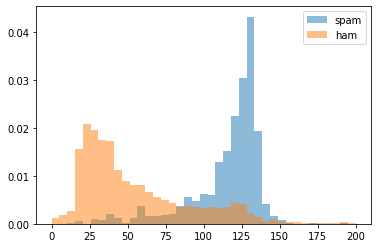

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline
bins = np.linspace(0,200,40)

plt.hist(data[data['label']=='spam']['body_len'], bins=bins, alpha=0.5, density=True,  label='spam')
plt.hist(data[data['label']=='ham']['body_len'], bins=bins, alpha=0.5, density=True, label='ham')
plt.legend(loc='upper right')
plt.show()

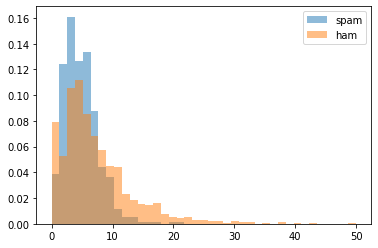

In [ ]:
bins = np.linspace(0,50,40)

plt.hist(data[data['label']=='spam']['punct%'], bins=bins, alpha=0.5,density=True,  label='spam')
plt.hist(data[data['label']=='ham']['punct%'], bins=bins, alpha=0.5,density=True, label='ham')
plt.legend(loc='upper right')
plt.show()

### Transform the punctuation % feature

### Box-Cox Power Transformation

**Base Form**: $$ y^x $$

| X    | Base Form           |           Transformation               |
|------|--------------------------|--------------------------|
| -2   | $$ y ^ {-2} $$           | $$ \frac{1}{y^2} $$      |
| -1   | $$ y ^ {-1} $$           | $$ \frac{1}{y} $$        |
| -0.5 | $$ y ^ {\frac{-1}{2}} $$ | $$ \frac{1}{\sqrt{y}} $$ |
| 0    | $$ y^{0} $$              | $$ log(y) $$             |
| 0.5  | $$ y ^ {\frac{1}{2}}  $$ | $$ \sqrt{y} $$           |
| 1    | $$ y^{1} $$              | $$ y $$                  |
| 2    | $$ y^{2} $$              | $$ y^2 $$                |


**Process**
1. Determine what range of exponents to test
2. Apply each transformation to each value of your chosen feature
3. Use some criteria to determine which of the transformations yield the best distribution

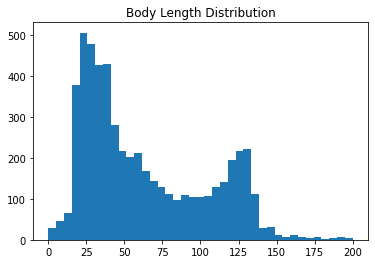

In [ ]:
bins = np.linspace(0, 200, 40)

plt.hist(data['body_len'], bins)
plt.title("Body Length Distribution")
plt.show()

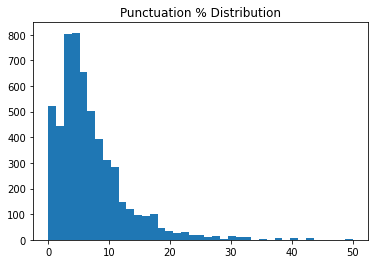

In [ ]:
bins = np.linspace(0, 50, 40)

plt.hist(data['punct%'], bins)
plt.title("Punctuation % Distribution")
plt.show()

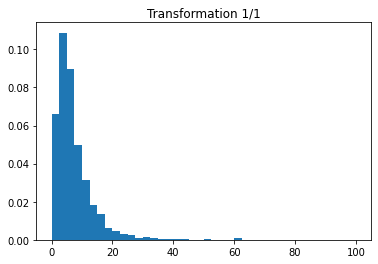

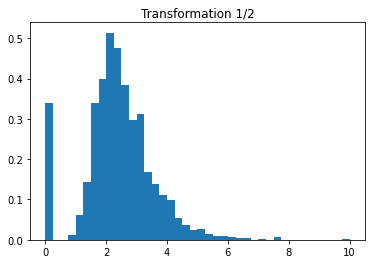

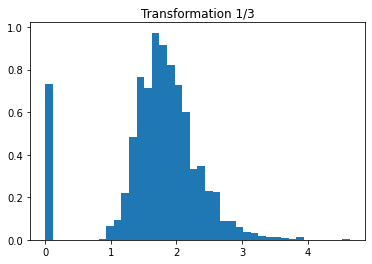

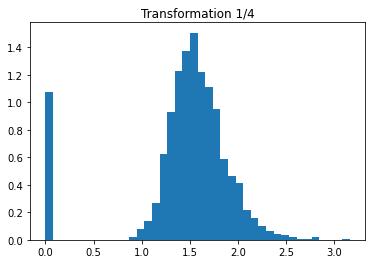

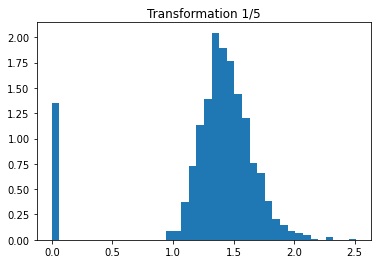

In [ ]:
for i in [1,2,3,4,5]:
  plt.hist((data['punct%'])**(1/i), bins=40, density=True)
  plt.title("Transformation 1/{}".format(i))
  plt.show()

# Building Machine Learning Classifiers: Building a basic Random Forest model

### Read in & clean text

In [ ]:
import nltk
import pandas as pd
import re
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
import string
import warnings
warnings.filterwarnings("ignore")

stopwords = nltk.corpus.stopwords.words('english')
ps = nltk.PorterStemmer()

data = pd.read_csv("SMSSpamCollection.tsv", sep='\t')
data.columns = ['label', 'body_text']

def count_punct(text):
    count = sum([1 for char in text if char in string.punctuation])
    return round(count/(len(text) - text.count(" ")), 3)*100

data['body_len'] = data['body_text'].apply(lambda x: len(x) - x.count(" "))
data['punct%'] = data['body_text'].apply(lambda x: count_punct(x))

def clean_text(text):
    text = "".join([word.lower() for word in text if word not in string.punctuation])
    tokens = re.split('\W+', text)
    text = [ps.stem(word) for word in tokens if word not in stopwords]
    return text

tfidf_vect = TfidfVectorizer(analyzer=clean_text)
X_tfidf = tfidf_vect.fit_transform(data['body_text'])

count_vect = CountVectorizer(analyzer = clean_text)
X_count = count_vect.fit_transform(data['body_text'])
X_count_feat = pd.concat([data['body_len'], data['punct%'], pd.DataFrame(X_count.toarray())], axis=1)

X_features = pd.concat([data['body_len'], data['punct%'], pd.DataFrame(X_tfidf.toarray())], axis=1)
X_features.head()

,body_len,punct%,0,1,2,3,4,5,6,7,...,8094,8095,8096,8097,8098,8099,8100,8101,8102,8103
0,128,4.7,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,49,4.1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,62,3.2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,28,7.1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,135,4.4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import KFold, cross_val_score

In [ ]:
dir(RandomForestClassifier())

In [ ]:
rf = RandomForestClassifier(n_jobs=-1)
kf = KFold(n_splits=5)
score = cross_val_score(rf, X=X_features, y = data['label'], cv=kf, scoring='accuracy')

In [ ]:
score

array([0.97396768, 0.97935368, 0.97663971, 0.96675651, 0.97214735])

### Explore RandomForestClassifier through Holdout Set

In [ ]:
from sklearn.metrics import precision_recall_fscore_support as score
from sklearn.model_selection import train_test_split

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X_features, data['label'], test_size=0.2)

rf = RandomForestClassifier(n_estimators=50, max_depth=20, n_jobs=-1)
rf_model = rf.fit(X_train, y_train)

y_pred = rf_model.predict(X_test)

precision, recall, fscore, support = score(y_test, y_pred, pos_label='spam', average='binary')

print("Precision {}, \n Recall {} \n Accuracy {}".format(np.round(precision, 3),\
                                                         np.round(recall, 3),
                                                         np.round(((y_pred == y_test).sum() / len(y_test)), 3)))

Precision 1.0, 
 Recall 0.645 
 Accuracy 0.952


### Build our own Grid-search

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import precision_recall_fscore_support as score
from sklearn.model_selection import train_test_split

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X_features, data['label'], test_size=0.2)

In [ ]:
def Train_RF(n_est, depth):
  rf = RandomForestClassifier(n_estimators=n_est, max_depth=depth, n_jobs=-1)
  rf_model = rf.fit(X_train, y_train)
  y_pred = rf_model.predict(X_test)
  precision, recall, fscore, support = score(y_pred, y_test, pos_label='spam', average='binary')
  print("n_estimators {} \ max_depth {} \ -------------Precision {} \n Recall {} \n Accuracy {}".format(n_est, depth, 
                                                                                                     np.round(precision, 3), \
                                                                                                     np.round(recall, 3),
                                                                                                     np.round(((y_pred==y_test).sum() / len(y_test)), 3)))

In [ ]:
for n_est in [10, 30, 50, 100]:
  for depth in [20, 30, 50, None]:
    Train_RF(n_est, depth)

n_estimators 10 \ max_depth 20 \ -------------Precision 0.527 
 Recall 1.0 
 Accuracy 0.938
n_estimators 10 \ max_depth 30 \ -------------Precision 0.726 
 Recall 0.981 
 Accuracy 0.962
n_estimators 10 \ max_depth 50 \ -------------Precision 0.815 
 Recall 0.983 
 Accuracy 0.974
n_estimators 10 \ max_depth None \ -------------Precision 0.74 
 Recall 0.991 
 Accuracy 0.965
n_estimators 30 \ max_depth 20 \ -------------Precision 0.603 
 Recall 1.0 
 Accuracy 0.948
n_estimators 30 \ max_depth 30 \ -------------Precision 0.74 
 Recall 1.0 
 Accuracy 0.966
n_estimators 30 \ max_depth 50 \ -------------Precision 0.801 
 Recall 1.0 
 Accuracy 0.974
n_estimators 30 \ max_depth None \ -------------Precision 0.815 
 Recall 0.992 
 Accuracy 0.975
n_estimators 50 \ max_depth 20 \ -------------Precision 0.651 
 Recall 1.0 
 Accuracy 0.954
n_estimators 50 \ max_depth 30 \ -------------Precision 0.705 
 Recall 1.0 
 Accuracy 0.961
n_estimators 50 \ max_depth 50 \ -------------Precision 0.795 
 Recall

# Building Machine Learning Classifiers: Evaluate Random Forest with GridSearchCV

**Grid-search:** Exhaustively search all parameter combinations in a given grid to determine the best model.

**Cross-validation:** Divide a dataset into k subsets and repeat the holdout method k times where a different subset is used as the holdout set in each iteration.

### Exploring parameter settings using GridSearchCV

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

In [ ]:
rf = RandomForestClassifier(n_jobs=-1)
param = {'n_estimators': [30, 50, 160, 200],
         'max_depth': [50, 90, 120, None]}

gs = GridSearchCV(rf, param_grid=param, cv = 5, n_jobs=-1)
gs.fit(X_features, data['label'])
pd.DataFrame(gs.cv_results_).sort_values('mean_test_score')[:5]

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_depth,param_n_estimators,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,3.228538,0.087770,0.334918,0.063726,50,30,"{'max_depth': 50, 'n_estimators': 30}",0.976661,0.975763,0.964960,0.964960,0.964061,0.969281,0.005676,16
2,11.745394,0.581972,0.477333,0.191090,50,160,"{'max_depth': 50, 'n_estimators': 160}",0.975763,0.971275,0.968553,0.965858,0.964960,0.969282,0.003922,15
1,4.090642,0.558904,0.357405,0.141804,50,50,"{'max_depth': 50, 'n_estimators': 50}",0.976661,0.972172,0.970350,0.964061,0.966757,0.970000,0.004359,14
3,13.611664,0.160791,0.481827,0.068162,50,200,"{'max_depth': 50, 'n_estimators': 200}",0.975763,0.970377,0.968553,0.966757,0.969452,0.970180,0.003037,13
12,3.540485,0.299122,0.330912,0.061678,None,30,"{'max_depth': None, 'n_estimators': 30}",0.978456,0.969479,0.973944,0.965858,0.966757,0.970899,0.004711,12


In [ ]:
rf = RandomForestClassifier(n_jobs=-1)
param = {'n_estimators': [30, 50, 160, 200],
         'max_depth': [50, 90, 120, None]}

gs = GridSearchCV(rf, param_grid=param, cv = 5, n_jobs=-1)
gs.fit(X_count_feat, data['label'])
pd.DataFrame(gs.cv_results_).sort_values('mean_test_score')[:5]

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_depth,param_n_estimators,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
2,11.014811,0.321786,0.409693,0.059190,50,160,"{'max_depth': 50, 'n_estimators': 160}",0.975763,0.966786,0.966757,0.960467,0.960467,0.966048,0.005616,16
0,2.725501,0.181715,0.291400,0.036306,50,30,"{'max_depth': 50, 'n_estimators': 30}",0.972172,0.965889,0.966757,0.961366,0.966757,0.966588,0.003435,15
3,13.727474,0.160334,0.396200,0.015687,50,200,"{'max_depth': 50, 'n_estimators': 200}",0.974865,0.968582,0.967655,0.961366,0.965858,0.967665,0.004373,14
1,3.808275,0.058381,0.314916,0.035885,50,50,"{'max_depth': 50, 'n_estimators': 50}",0.973968,0.971275,0.970350,0.962264,0.964960,0.968563,0.004299,13
12,3.825616,0.142044,0.303807,0.049146,None,30,"{'max_depth': None, 'n_estimators': 30}",0.976661,0.974865,0.973944,0.965858,0.968553,0.971976,0.004082,12
